In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [93]:
mesures_normees = pd.read_csv("../preprocessing/donnees_mesures_PM2_5.csv",sep=';')
env_normees = pd.read_csv("../preprocessing/donnees_environnement_capteurs.csv",sep=';')
env_normees

,Capteurs,Typologie_zone,Type_voie,Nombre_voies,Distance_capteur_voie,Position_capteurs,Presence_arbres,Feuille_arbres,Morphologie_urbaine,Hauteur_batiments,Distance_capteur_batiment,Particularite,Trafic_Routier_vehicule_leger,Trafic_Routier_poids_lourds,Trafic_Routier_2_roues,emission_moyenne_annuelle_kg_maille_an,Donnees_Cartographie
0,c1,-0.517024,0.430795,-1.320749,-1.290219,0.877568,0.808421,-0.094694,-0.40209,-0.239525,-0.958066,1.215253,1.086158,1.353421,1.105770,0.943359,1.209708
1,c2,-0.517024,0.430795,-1.320749,-1.290219,-0.573411,0.808421,-0.094694,-0.40209,-0.820374,0.388781,-1.688184,1.086158,1.353421,1.105770,0.943359,1.209708
2,c3,-0.517024,-1.934512,-1.320749,-1.290219,-2.508050,0.808421,-0.094694,-0.40209,-0.820374,-0.958066,-0.817153,1.086158,1.353421,1.105770,0.943359,0.299326
3,c4,-0.517024,-1.934512,-1.320749,-1.290219,-0.573411,0.808421,-0.094694,-0.40209,-0.820374,-0.958066,-1.107497,1.086158,1.353421,1.105770,0.943359,1.957521
4,c5,-0.517024,0.430795,-1.320749,-1.290219,0.877568,0.808421,-0.094694,-0.40209,-0.239525,-0.958066,1.215253,1.086158,1.353421,1.105770,0.943359,0.413124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,c93,0.958016,0.430795,-0.206726,0.830989,0.877568,0.808421,-0.094694,-0.40209,0.922172,-0.060168,-0.236465,-0.723478,-0.717663,-0.754825,0.528258,0.185529
93,c94,0.958016,0.430795,0.350286,-0.583150,-0.089751,0.808421,-0.094694,-0.40209,-1.982071,-0.060168,0.634566,-0.723478,-0.717663,-0.754825,0.528258,0.348097
94,c95,0.958016,1.219230,-0.206726,0.830989,0.877568,0.808421,1.742374,-0.40209,-0.239525,-0.958066,1.215253,-0.723478,-0.717663,-0.754825,-0.664124,-0.838650
95,c96,0.958016,0.430795,0.350286,0.830989,0.877568,0.808421,1.742374,-0.40209,-0.239525,-0.958066,-0.526809,0.186410,-0.689370,0.211407,-0.664124,-0.269662


In [94]:
Capteurs = env_normees['Capteurs']
env_normees = env_normees.drop(env_normees.columns[0], axis=1)
env_normees

,Typologie_zone,Type_voie,Nombre_voies,Distance_capteur_voie,Position_capteurs,Presence_arbres,Feuille_arbres,Morphologie_urbaine,Hauteur_batiments,Distance_capteur_batiment,Particularite,Trafic_Routier_vehicule_leger,Trafic_Routier_poids_lourds,Trafic_Routier_2_roues,emission_moyenne_annuelle_kg_maille_an,Donnees_Cartographie
0,-0.517024,0.430795,-1.320749,-1.290219,0.877568,0.808421,-0.094694,-0.40209,-0.239525,-0.958066,1.215253,1.086158,1.353421,1.105770,0.943359,1.209708
1,-0.517024,0.430795,-1.320749,-1.290219,-0.573411,0.808421,-0.094694,-0.40209,-0.820374,0.388781,-1.688184,1.086158,1.353421,1.105770,0.943359,1.209708
2,-0.517024,-1.934512,-1.320749,-1.290219,-2.508050,0.808421,-0.094694,-0.40209,-0.820374,-0.958066,-0.817153,1.086158,1.353421,1.105770,0.943359,0.299326
3,-0.517024,-1.934512,-1.320749,-1.290219,-0.573411,0.808421,-0.094694,-0.40209,-0.820374,-0.958066,-1.107497,1.086158,1.353421,1.105770,0.943359,1.957521
4,-0.517024,0.430795,-1.320749,-1.290219,0.877568,0.808421,-0.094694,-0.40209,-0.239525,-0.958066,1.215253,1.086158,1.353421,1.105770,0.943359,0.413124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.958016,0.430795,-0.206726,0.830989,0.877568,0.808421,-0.094694,-0.40209,0.922172,-0.060168,-0.236465,-0.723478,-0.717663,-0.754825,0.528258,0.185529
93,0.958016,0.430795,0.350286,-0.583150,-0.089751,0.808421,-0.094694,-0.40209,-1.982071,-0.060168,0.634566,-0.723478,-0.717663,-0.754825,0.528258,0.348097
94,0.958016,1.219230,-0.206726,0.830989,0.877568,0.808421,1.742374,-0.40209,-0.239525,-0.958066,1.215253,-0.723478,-0.717663,-0.754825,-0.664124,-0.838650
95,0.958016,0.430795,0.350286,0.830989,0.877568,0.808421,1.742374,-0.40209,-0.239525,-0.958066,-0.526809,0.186410,-0.689370,0.211407,-0.664124,-0.269662


In [95]:
# pca = PCA(n_components=2)
# mesures_acp = pca.fit_transform(mesures_normees)
# tsne = TSNE(n_components=2, random_state=42)
# mesures_tsne = tsne.fit_transform(mesures_acp)

# plt.figure(figsize=(12, 6))

# # Nuage de points de l'ACP
# plt.subplot(1, 2, 1)
# plt.scatter(mesures_acp[:, 0], mesures_acp[:, 1],s=0.1)
# plt.title("ACP")

# # Nuage de points t-SNE
# plt.subplot(1, 2, 2)
# plt.scatter(mesures_tsne[:, 0], mesures_tsne[:, 1],s=0.1)
# plt.title("t-SNE")

# plt.show()




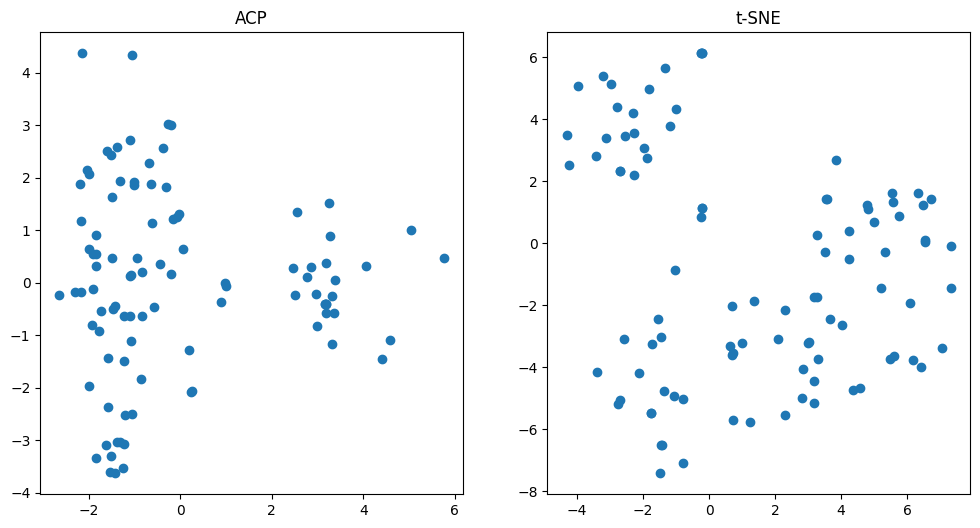

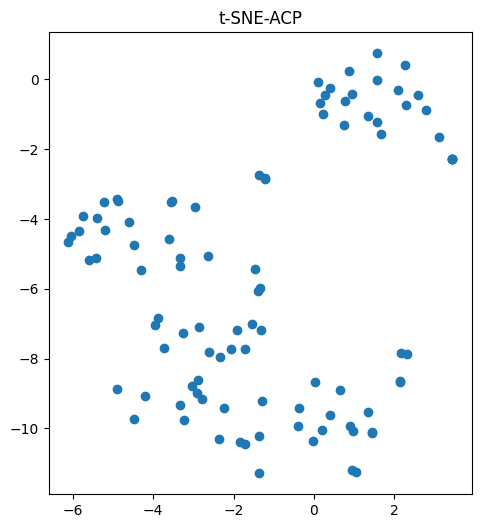

In [96]:
pca = PCA(n_components=4)
env_acp = pca.fit_transform(env_normees)

tsne = TSNE(n_components=2, random_state=42)
env_tsne_acp = tsne.fit_transform(env_acp)
env_tsne = tsne.fit_transform(env_normees)

plt.figure(figsize=(12, 6))

# Nuage de points de l'ACP
plt.subplot(1, 2, 1)
plt.scatter(env_acp[:, 0], env_acp[:, 1])
plt.title("ACP")

# Nuage de points t-SNE
plt.subplot(1, 2, 2)
plt.scatter(env_tsne[:, 0], env_tsne[:, 1])
plt.title("t-SNE")

plt.figure(figsize=(12, 6))

# Nuage de points t-SNE-ACP
plt.subplot(1, 2, 2)
plt.scatter(env_tsne_acp[:, 0], env_tsne_acp[:, 1])
plt.title("t-SNE-ACP")

plt.show()

In [97]:
matrice_corr = env_normees.corr()
matrice_corr

,Typologie_zone,Type_voie,Nombre_voies,Distance_capteur_voie,Position_capteurs,Presence_arbres,Feuille_arbres,Morphologie_urbaine,Hauteur_batiments,Distance_capteur_batiment,Particularite,Trafic_Routier_vehicule_leger,Trafic_Routier_poids_lourds,Trafic_Routier_2_roues,emission_moyenne_annuelle_kg_maille_an,Donnees_Cartographie
Typologie_zone,1.000000,-0.220877,0.248868,0.370505,0.052886,-0.047574,0.069767,-0.347928,0.207387,-0.201783,0.173556,-0.209963,-0.235349,-0.225360,0.053727,-0.101846
Type_voie,-0.220877,1.000000,-0.123736,-0.197064,0.231297,0.123229,0.145318,0.252474,-0.029009,0.120798,-0.027930,0.126842,0.152644,0.129805,0.071804,0.039661
Nombre_voies,0.248868,-0.123736,1.000000,0.192088,0.148088,-0.147471,-0.003752,-0.195107,0.137270,-0.118138,0.256226,-0.728442,-0.700993,-0.731524,-0.307444,-0.488624
Distance_capteur_voie,0.370505,-0.197064,0.192088,1.000000,-0.147529,-0.382069,-0.302956,-0.234479,0.101660,-0.123446,0.016604,-0.293408,-0.227236,-0.297856,0.137896,-0.048350
Position_capteurs,0.052886,0.231297,0.148088,-0.147529,1.000000,0.308228,0.280040,-0.073903,0.172549,-0.034501,0.166979,-0.243835,-0.155039,-0.238002,-0.178201,-0.227337
Presence_arbres,-0.047574,0.123229,-0.147471,-0.382069,0.308228,1.000000,0.747910,0.169085,-0.012202,0.267400,0.049689,0.075030,0.064935,0.078650,-0.312424,-0.194273
Feuille_arbres,0.069767,0.145318,-0.003752,-0.302956,0.280040,0.747910,1.000000,0.126073,0.021321,0.198364,0.024348,-0.111425,-0.135904,-0.112689,-0.371634,-0.336961
Morphologie_urbaine,-0.347928,0.252474,-0.195107,-0.234479,-0.073903,0.169085,0.126073,1.000000,-0.556931,0.557476,-0.276683,-0.016390,0.010322,-0.010161,-0.307084,-0.216647
Hauteur_batiments,0.207387,-0.029009,0.137270,0.101660,0.172549,-0.012202,0.021321,-0.556931,1.000000,-0.194532,0.134608,-0.116751,-0.115277,-0.123036,0.270166,0.032952
Distance_capteur_batiment,-0.201783,0.120798,-0.118138,-0.123446,-0.034501,0.267400,0.198364,0.557476,-0.194532,1.000000,-0.239988,-0.091284,0.036386,-0.081452,-0.293546,-0.191614


In [98]:
matrice_corr_sup = np.triu(matrice_corr, k=1)

maximum_corr = np.max(matrice_corr_sup)
indice_max = np.unravel_index(np.argmax(matrice_corr_sup), matrice_corr_sup.shape)
ligne_max, colonne_max = indice_max

indice_min = np.unravel_index(np.argmin(matrice_corr_sup), matrice_corr_sup.shape)
ligne_min, colonne_min = indice_min
minimum_corr = np.min(matrice_corr_sup)

print(matrice_corr.columns[colonne_max],matrice_corr.index[ligne_max],maximum_corr)
print(matrice_corr.columns[colonne_min],matrice_corr.index[ligne_min],minimum_corr)

Trafic_Routier_2_roues Trafic_Routier_vehicule_leger 0.9991026834241685
Trafic_Routier_2_roues Nombre_voies -0.7315241329192781


In [116]:
# Obtenir les indices des données les moins corrélées
indice_min = np.unravel_index(np.argmin(np.abs(matrice_corr)), matrice_corr.shape)
ligne_min, colonne_min = indice_min
minimum_corr = np.min(np.abs(matrice_corr))

In [118]:
print(matrice_corr.columns[colonne_min],matrice_corr.index[ligne_min],minimum_corr)

Feuille_arbres Nombre_voies 0.0037520200029214487
